In [1]:
!pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


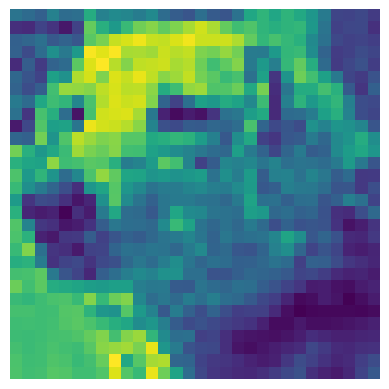

In [8]:
import torch
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Loading the data from Google Drive:
drive.mount('/content/drive')
image_path ='/content/drive/MyDrive/ML/dog1.jpeg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

1.1 Data Preparation:

<ipython-input-11-55a68b26f3cb>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array = imageio.imread(image_path)


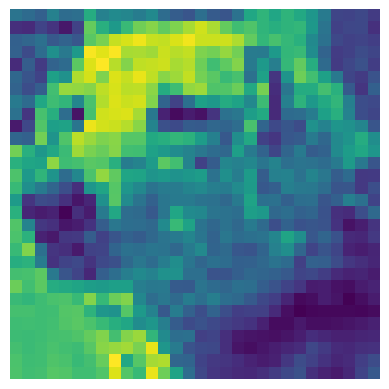

Size of the array: (30, 30)
Array of the image:
[[ 98  89  78 112  90  93 158 112 122 117 107 121  90  75  67  93  73  67
   96 152 167 151 166 154 134 105  53  51  55  44]
 [ 34  31  51  38  16  50 195 161 138 173 200 209 194 206 222 237 223 195
  177 185 167 160 166 169 136  98  49  54  55  35]
 [ 78  84  94  71  81  69 190 204 233 240 249 234 232 241 250 235 235 236
  224 194 169 181 170 162 121  95  55  49  52  47]
 [ 79  58  90 127 103 137 253 244 254 222 223 219 235 228 232 206 201 215
  201 106 105 137 169 173 124  81  45  49  59  53]
 [ 31  75  44  81  89 191 242 255 228 208 231 233 236 222 227 199 177 192
  208 104 137 109 170 194 159  88  44  54  63  46]
 [ 85  66  51 145 129 225 239 206 242 233 247 231 210 218 232 202 190 173
  181  95 146  39 132 199 178 145 103  53  44  65]
 [ 81  60  76 178 216 214 209 230 240 229 230 211 157 176 214 218 185 186
  198 154 203  33 100 157 157 179 162  72  39  78]
 [104  89 152 176 168 117 182 226 242 235 238 207  82  50  94 145 136 157
  1

In [11]:

import numpy as np
import imageio

# 2. Using imageio to read the image into an array
img_array = imageio.imread(image_path)

# 3. Displaying the image in the output box
plt.imshow(img)
plt.axis('off')
plt.show()

# 4. Printing the size of the array
print("Size of the array:", img_array.shape)

# 5. Printing the numeric matrix form of the image
print("Array of the image:")
print(img_array)


1.2: Implementation of Convolutional Filter:

Convolution result (first ten rows):
[[-269 -149  -60 -242 -139  -74 -232   -7 -121  -66   10  -78   30   63
   122    5   91   96   12 -160 -198 -111 -193 -147 -141 -135   -7  -42
   -70  -86]
 [  71  134   37   98  195  173 -221    5  137    3  -62  -87  -39  -92
  -128 -175 -152  -77   -8  -50   13   25    1  -58  -22   -7   64  -12
   -24    6]
 [-115  -75  -80   56  -65  182  -39   12  -96  -83  -99  -27  -24  -48
   -70  -12  -45  -75  -88  -92  -29  -88   -2  -15   33  -25   18   14
     2  -48]
 [-149   96  -37 -163   22   68 -199  -10  -89   37   29   49  -25   18
   -17   43   29  -30  -51  180  129   16  -26  -43   38   28   49   11
   -19  -60]
 [ 115 -101  121   81  148  -71  -30 -100   47   82  -13  -15  -44   21
   -23   16   74    5 -154  130  -84   47  -76  -75  -52   77  114   -7
   -49   -3]
 [-162    7  127 -141  159 -127  -74  142  -61   -6  -63  -23    2  -32
   -67   31  -23   57  -50  205 -110  264  -20 -135  -52  -32   -8   61
    44  -92]
 [ -75   72  137  -99

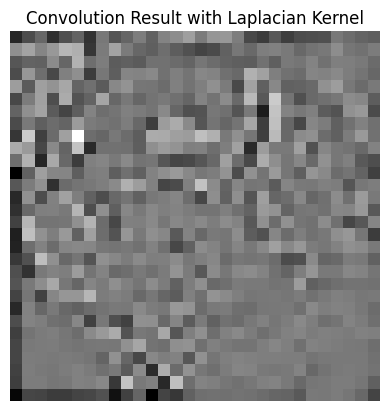

In [13]:

from scipy.signal import convolve2d

# 1. Preparing a 3x3 Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# 2. Conducting convolution on the image with the prepared kernel
convolution_result = convolve2d(img_array, laplacian_kernel, mode='same', boundary='fill', fillvalue=0)

# 3. Printing the convolution result for first ten rows
print("Convolution result (first ten rows):")
print(convolution_result[:10])

# 4. Printing  the shape of the convolution result
print("Shape of the convolution result:", convolution_result.shape)

# 5. Displaying the convolution result as image with matplotlib
plt.imshow(convolution_result, cmap='gray')
plt.title('Convolution Result with Laplacian Kernel')
plt.axis('off')
plt.show()

1.4 Implementation of MaxPooling:

Max pooling result (first ten rows):
[[ 134.   98.  195.    5.  137.   10.   63.  122.   96.   12.   25.    1.
    -7.   64.    6.]
 [  96.   56.  182.   12.   37.   49.   18.   43.   29.  180.  129.   -2.
    38.   49.    2.]
 [ 115.  127.  159.  142.   82.  -13.   21.   31.   74.  205.  264.  -20.
    77.  114.   44.]
 [  72.  137.  109.   29.   22.    5.  159.   52.  -10.  143.  240.   33.
    40.   76.   98.]
 [ 263.   49.  435.  -26.   -4.  159.  157.  226.  176.  127.  210.  125.
    73.    8.  102.]
 [ 184.  155.   37.   38.   51.   26.  103.   47.  124.   77.  162.   44.
    88.   20.  -74.]
 [  76.   76.  127.   14.  175.  116.   36.  234.   67.   70.  120.   45.
    21.   61.  108.]
 [ 196.   21.  192.  188.   44.   50.   42.   50.   59.   29.  105.   77.
    58.   44.   97.]
 [ 226.   75.  101.  126.   92.   69.   44.   61.   32.   62.  126.   96.
     9.   94.   55.]
 [-128.  220.  110.   73.   44.   53.   86.   18.   55.   60.   33.   15.
    90.   44.   33.]]
Shape of the

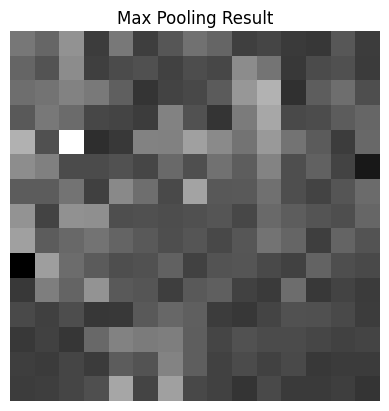

In [16]:

def max_pooling(input_array, pool_size):
    # Calculating the size of the output array
    output_shape = (
        input_array.shape[0] // pool_size[0],
        input_array.shape[1] // pool_size[1]
    )
    # Initializing the output array with zeros
    pooled_array = np.zeros(output_shape)

    # Perform max pooling
    for i in range(0, input_array.shape[0], pool_size[0]):
        for j in range(0, input_array.shape[1], pool_size[1]):
            window = input_array[i:i + pool_size[0], j:j + pool_size[1]]
            pooled_array[i // pool_size[0], j // pool_size[1]] = np.max(window)

    return pooled_array

# 1. Preparing a 2x2 pooling mask
pool_size = (2, 2)

if convolution_result.ndim == 3 and convolution_result.shape[2] == 3:
    grayscale_image = convolution_result.mean(axis=2).astype(convolution_result.dtype)
else:
    grayscale_image = convolution_result

# 2. Conducting max pooling on image with prepared mask
max_pooled_result = max_pooling(grayscale_image, pool_size)

# 3. Printing out max pooling result for first ten rows
print("Max pooling result (first ten rows):")
print(max_pooled_result[:10])

# 4. Printing out the shape of the max pooling result
print("Shape of the max pooling result:", max_pooled_result.shape)

# 5. Displaying max pooling result as image with matplotlib
plt.imshow(max_pooled_result, cmap='gray', interpolation='none')
plt.title('Max Pooling Result')
plt.axis('off')
plt.show()

1.5 Library Preparation:

In [17]:

# We have already imported numpy and torch earlier in the code.
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [32]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Task 1: Downloading Fashion MNIST data to split it
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Downloading the specified training data
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
# Downloading the specified test data
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Task 4: Print out the first image in the training set and its corresponding label index
first_image, first_label = next(iter(train_loader))
print("First image in the training set:")
print(first_image[0])
print("Corresponding label index:", first_label[0].item())

# Task 5: Printing out the shape of total training data, the number of training samples, and the number of test samples.
print("Shape of total training data:", first_image.shape)
print("Number of training samples:", len(train_data))
print("Number of test samples:", len(test_data))

First image in the training set:
tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])
Corresponding label index: 4
Shape of total training data: torch.Size([64, 1, 32, 32])
Number of training samples: 60000
Number of test samples: 10000


1.6 Training Data Preparation

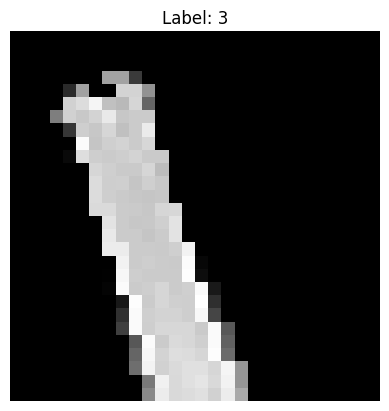

First image in the training set displayed. Corresponding label index: 3


In [19]:

# Define transformations for the training data
train_transform = transforms.Compose([
    transforms.RandomCrop(28, padding=4),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Define transformations for the testing data
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Loading the training and testing datasets from PyTorch with the specified transforms
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=test_transform)

# Loading one batch of data to find the first image and its label
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
images, labels = next(iter(train_loader))

# Displaying the first image in the batch
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.title(f'Label: {labels[0].item()}')
plt.axis('off')
plt.show()

# Printing the first image and its corresponding label index
print(f"First image in the training set displayed. Corresponding label index: {labels[0].item()}")


In [22]:
pip install torchsummary

1.7 LeNet -5:

In [29]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = LeNet5().to(device)

# Printing the summary. The input size is (1, 32, 32) corresponding to (channels, height, width).
summary(model, (1, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 32, 32]             156
            Conv2d-2           [-1, 16, 12, 12]           2,416
            Linear-3                  [-1, 120]          69,240
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 0.32
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


1.8 LeNet 5 Model Training

In [31]:

import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Setting up the transformations and load the datasets
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the model, optimizer, and loss function as required in the question
model = LeNet5().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, nesterov=True)
criterion = nn.CrossEntropyLoss()

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_preds / total_preds
    print(f'Epoch {epoch+1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%')

# Evaluating the model
model.eval()
test_loss = 0.0
correct_preds = 0
total_preds = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

test_loss /= len(test_loader)
test_accuracy = 100 * correct_preds / total_preds
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Epoch 1, Train Loss: 0.6678, Train Accuracy: 75.32%
Epoch 2, Train Loss: 0.4450, Train Accuracy: 83.71%
Epoch 3, Train Loss: 0.4111, Train Accuracy: 84.81%
Epoch 4, Train Loss: 0.3941, Train Accuracy: 85.55%
Epoch 5, Train Loss: 0.3924, Train Accuracy: 85.58%
Epoch 6, Train Loss: 0.3832, Train Accuracy: 85.93%
Epoch 7, Train Loss: 0.3796, Train Accuracy: 86.21%
Epoch 8, Train Loss: 0.3905, Train Accuracy: 85.90%
Epoch 9, Train Loss: 0.3891, Train Accuracy: 85.90%
Epoch 10, Train Loss: 0.3768, Train Accuracy: 86.41%
Test Loss: 0.4349, Test Accuracy: 84.61%
